<a href="https://colab.research.google.com/github/hpink97/ML_notebooks/blob/main/05_image_classification_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
##import libraries

##tf 

import tensorflow 
from tensorflow import keras
from tensorflow.keras import layers


import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000, 
    formatter=dict(float=lambda x: "%.3g" % x))

##file related libs
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import image_dataset_from_directory as import_img_dir
from google.colab import files
import os, shutil, pathlib


##hide warnings
tensorflow.get_logger().setLevel('ERROR')

# Model 1 : MNIST CNN with Maxpooling

In [2]:
#import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
#### show an example image
n = int(np.random.choice(train_images.shape[0], 1, replace=False)  )
example_digit = train_images[n]
example_digit

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 198, 255, 254, 254, 106,  91, 143, 142,  91,  91,  91,  76,   0,   0

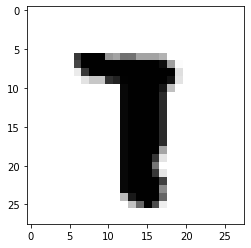

image label =7


In [4]:
plt.imshow(example_digit, cmap=plt.cm.binary)
plt.show()

print(f"image label ={train_labels[n]}")

In [5]:
### reshape and scale data
train_images = train_images.reshape((60000,28,28,1)).astype('float32')/255
test_images = test_images.reshape((10000,28,28,1)).astype('float32')/255

## Initiate the convolutional neural network (CNN)


*   Takes input tensor (image_height, image_width, image_channels)

`Conv2D()` is the convolutional layer. This will split the input tensor into 2D windows of size `kernel_size * kernal_size`. In addition it will also compute `filters`, which is the depth of the layer's output tensor. These are no longer colour channels, but arbritary filters calculated by the layer...


`MaxPooling2D` reduces the size of the output tensor, applying a hardcoded MAX transformation on 2*2 tensors. Allows information to be encoded on a larger proportion of the original input. Also reduces the complexity of the model, reducing compute and overfitting!!.

In [6]:
##initate a CovNet
inputs = keras.Input(shape=(28,28,1)) #28*28 pixel black&white images
my_layers = layers.Conv2D(filters=32, kernel_size=2, activation='relu')(inputs)
my_layers = layers.MaxPooling2D(pool_size =2)(my_layers)
my_layers = layers.Conv2D(filters=128, kernel_size=2, activation='relu')(my_layers)
my_layers = layers.MaxPooling2D(pool_size =2)(my_layers)
my_layers = layers.Conv2D(filters=256, kernel_size=3, activation='relu')(my_layers)
my_layers = layers.MaxPooling2D(pool_size =2)(my_layers)
my_layers = layers.Flatten()(my_layers)
#mnist is 0-9, so output will be shape 10
outputs= layers.Dense(10, activation ='softmax')(my_layers)
covnet = keras.Model(inputs=inputs, outputs=outputs)

##summarise model
covnet.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 27, 27, 32)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 128)       16512     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 128)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 256)         295168

In [7]:
covnet.compile(optimizer='rmsprop',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

covnet.fit(train_images, train_labels, epochs=8, batch_size=128)

Epoch 1/8
469/469 [==============================] - 18s 6ms/step - loss: 0.2430 - accuracy: 0.9251
Epoch 2/8
469/469 [==============================] - 3s 5ms/step - loss: 0.0528 - accuracy: 0.9835
Epoch 3/8
469/469 [==============================] - 3s 5ms/step - loss: 0.0335 - accuracy: 0.9891
Epoch 4/8
469/469 [==============================] - 3s 6ms/step - loss: 0.0246 - accuracy: 0.9925
Epoch 5/8
469/469 [==============================] - 3s 5ms/step - loss: 0.0178 - accuracy: 0.9946
Epoch 6/8
469/469 [==============================] - 3s 5ms/step - loss: 0.0141 - accuracy: 0.9956
Epoch 7/8
469/469 [==============================] - 3s 5ms/step - loss: 0.0108 - accuracy: 0.9966
Epoch 8/8
469/469 [==============================] - 3s 5ms/step - loss: 0.0082 - accuracy: 0.9972


## **99% accuracy on the MNIST dataset with this first CNN!!** 🏆 🏆

In [8]:
test_loss, test_acc =covnet.evaluate(test_images, test_labels)
print(f"CovNet testing accuracy on MNIST = {test_acc*100:.3f}%")

313/313 [==============================] - 1s 3ms/step - loss: 0.0321 - accuracy: 0.9911
CovNet testing accuracy on MNIST = 99.110%


# Model 2: Initial Cats vs Dogs CNN (2K samples)

*   Pull data from `dogs-vs-cats` kaggle competition images using the kaggle API
*   Use a relatively small dataset; 2000 training images, 1000 validation images and 2000 test images
*   Train another CNN with `Conv2D` and `MaxPooling` layers




In [18]:
! rm ~/.kaggle/kaggle.json

rm: cannot remove '/root/.kaggle/kaggle.json': No such file or directory


In [20]:
##import cat vs dogs kaggle competetion data


files.upload() ##upload kaggle api key
! mkdir ~/.kaggle/
! cp kaggle.json  ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
##download competition data from API
! kaggle competitions download -c dogs-vs-cats
## unzip files
!unzip -qq dogs-vs-cats.zip
! unzip -qq train.zip

Saving kaggle.json to kaggle.json
mkdir: cannot create directory ‘/root/.kaggle/’: File exists
100% 810M/812M [00:21<00:00, 43.0MB/s]
100% 812M/812M [00:21<00:00, 39.3MB/s]


### Define function generate directories for the data splits (train/validate/test), adding images by their numerical index

In [21]:

def subset_images(subset_name, start_i, end_i):
  for x in ('cat','dog'):
    dir = new_dir/subset_name/x
    if dir.exists() and dir.is_dir():
      shutil.rmtree(dir)
    os.makedirs(dir)
    file_names = [f"{x}.{i}.jpg" for i in range(start_i, end_i)]
    for jpg in file_names:
      shutil.copyfile(src=orig_dir/jpg,
                      dst = dir/jpg)
      



In [22]:
orig_dir = pathlib.Path('train')
new_dir = pathlib.Path('cats_vs_dogs_small')

subset_images('train',0,1000)
subset_images('validation',1000,1500)
subset_images('test',1500,2500)

!ls cats_vs_dogs_small/train/dog | head -10

dog.0.jpg
dog.100.jpg
dog.101.jpg
dog.102.jpg
dog.103.jpg
dog.104.jpg
dog.105.jpg
dog.106.jpg
dog.107.jpg
dog.108.jpg


In [23]:
cats_v_dogs_train = import_img_dir(
    new_dir /'train',
    image_size=(180,180),
    batch_size =32
)


for batch_img, batch_labels in cats_v_dogs_train:
  print(f"image data shape = {batch_img.shape}")
  print(f"label data shape = {batch_labels.shape}")
  break

Found 2000 files belonging to 2 classes.
image data shape = (32, 180, 180, 3)
label data shape = (32,)


## Have a look at some of the data points

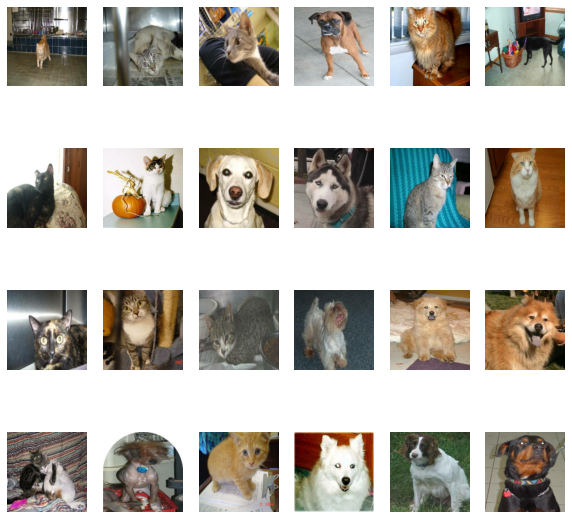

In [24]:
n_row = 4
n_col =6
plt.rcParams['figure.figsize'] = [10*n_row, 10*n_col]
plt.figure(figsize=(10,10)),
for i in range(n_row*n_col):
  for img, _ in cats_v_dogs_train.take(1):
    ax = plt.subplot(n_row,n_col,i+1)
    ax.axis('off')
    plt.imshow(img[0].numpy().astype("uint8"))

In [25]:
inputs = keras.Input(shape=(180,180,3)) ##180*180 RGB images
x = layers.Rescaling(1./255)(inputs)##rescale to 0-1
x = layers.Conv2D(filters=32,kernel_size=3,activation ='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64,kernel_size=3,activation ='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128,kernel_size=3,activation ='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256,kernel_size=3,activation ='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256,kernel_size=3,activation ='relu')(x)
#x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation = 'sigmoid')(x)
dog_cat_cnn = keras.Model(inputs=inputs, outputs=outputs)

dog_cat_cnn.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                       

In [26]:
##compile the model 
dog_cat_cnn.compile(
    loss = 'binary_crossentropy', ##2 outcomes - cat or dog
    optimizer='rmsprop',
    metrics = ['accuracy','FalsePositives']
)

In [27]:
##import validation dataset
cats_v_dogs_val = import_img_dir(
    new_dir /'validation',
    image_size=(180,180),
    batch_size =32
)

Found 1000 files belonging to 2 classes.


### Train the model, using an early stoppimg mechanism

In [28]:
early_stop = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=5e-3, ## ignore any improvement under 0.005
    patience=25, ##keep training for 8 epochs
    restore_best_weights=True,
    verbose =1
)

history1 = dog_cat_cnn.fit(
    cats_v_dogs_train,
    epochs= 60, 
    validation_data = cats_v_dogs_val,
    callbacks = [early_stop]

)

Epoch 1/60
63/63 [==============================] - 8s 76ms/step - loss: 0.7003 - accuracy: 0.5050 - false_positives: 475.0000 - val_loss: 0.6885 - val_accuracy: 0.5170 - val_false_positives: 470.0000
Epoch 2/60
63/63 [==============================] - 4s 63ms/step - loss: 0.6956 - accuracy: 0.5510 - false_positives: 393.0000 - val_loss: 0.6836 - val_accuracy: 0.5100 - val_false_positives: 489.0000
Epoch 3/60
63/63 [==============================] - 5s 78ms/step - loss: 0.6786 - accuracy: 0.5840 - false_positives: 450.0000 - val_loss: 0.6513 - val_accuracy: 0.6150 - val_false_positives: 52.0000
Epoch 4/60
63/63 [==============================] - 4s 61ms/step - loss: 0.6525 - accuracy: 0.6490 - false_positives: 316.0000 - val_loss: 0.6094 - val_accuracy: 0.6660 - val_false_positives: 87.0000
Epoch 5/60
63/63 [==============================] - 5s 68ms/step - loss: 0.6004 - accuracy: 0.6765 - false_positives: 305.0000 - val_loss: 0.6472 - val_accuracy: 0.6190 - val_false_positives: 332.00

## Define a function to visualise the training process

In [29]:
def plot_training(hist):
  train_acc = hist.history['accuracy']
  val_acc = hist.history['val_accuracy']

  train_loss =hist.history['loss']
  val_loss = hist.history['val_loss']

  n_epochs = len(val_loss)+1
  x = range(1,n_epochs)

  ##make accuracy plot
  plt.plot(x , train_acc, 'ro', label = 'Training Accuracy')
  plt.plot(x , val_acc, 'b', label = 'Validation Accuracy')
  plt.title('Training vs Validation Accuracy')
  plt.legend()
  ##make new figure for Loss plot
  plt.figure() 
  plt.plot(x , train_loss, 'ro', label = 'Training Loss')
  plt.plot(x , val_loss, 'b', label = 'Validation Loss')
  plt.title('Training vs Validation Loss')
  plt.legend()
  plt.show()


### We can see dramatic overfitting from epoch 8 onwards (an expected problem with our small sample size...)

Training accuracy reaches around 98%, but validation accuracy pleateaus at approx 70-75%

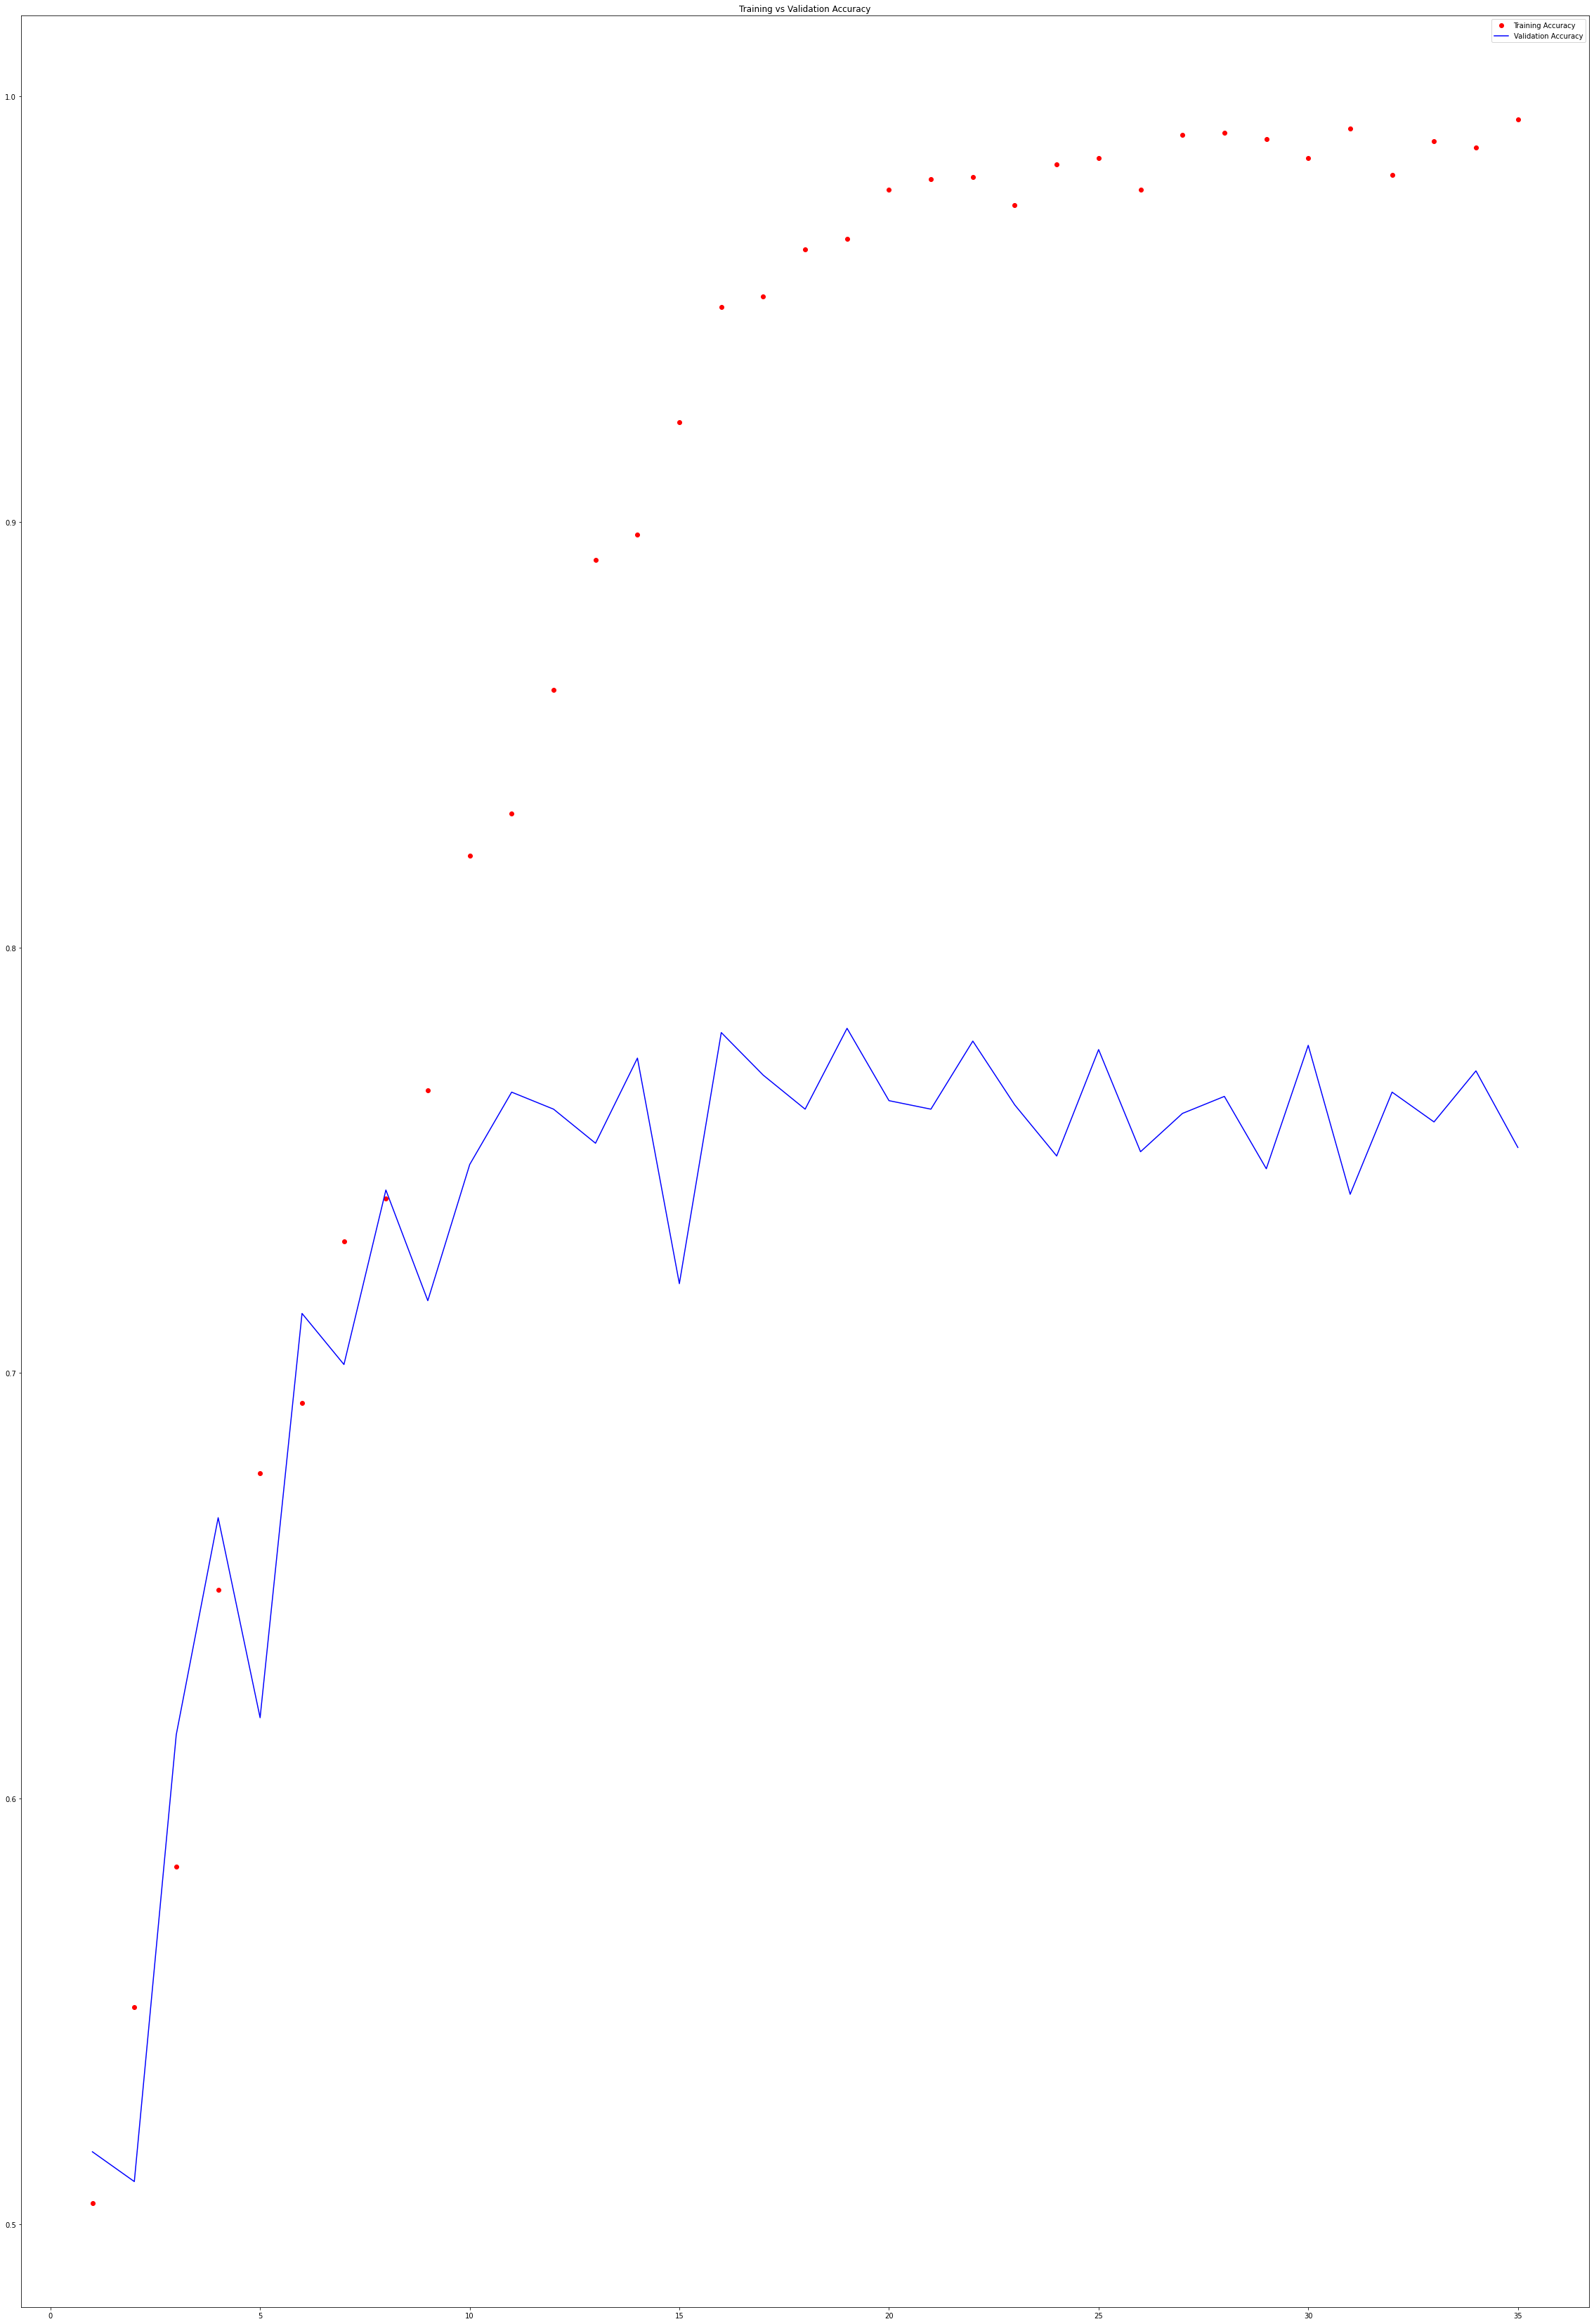

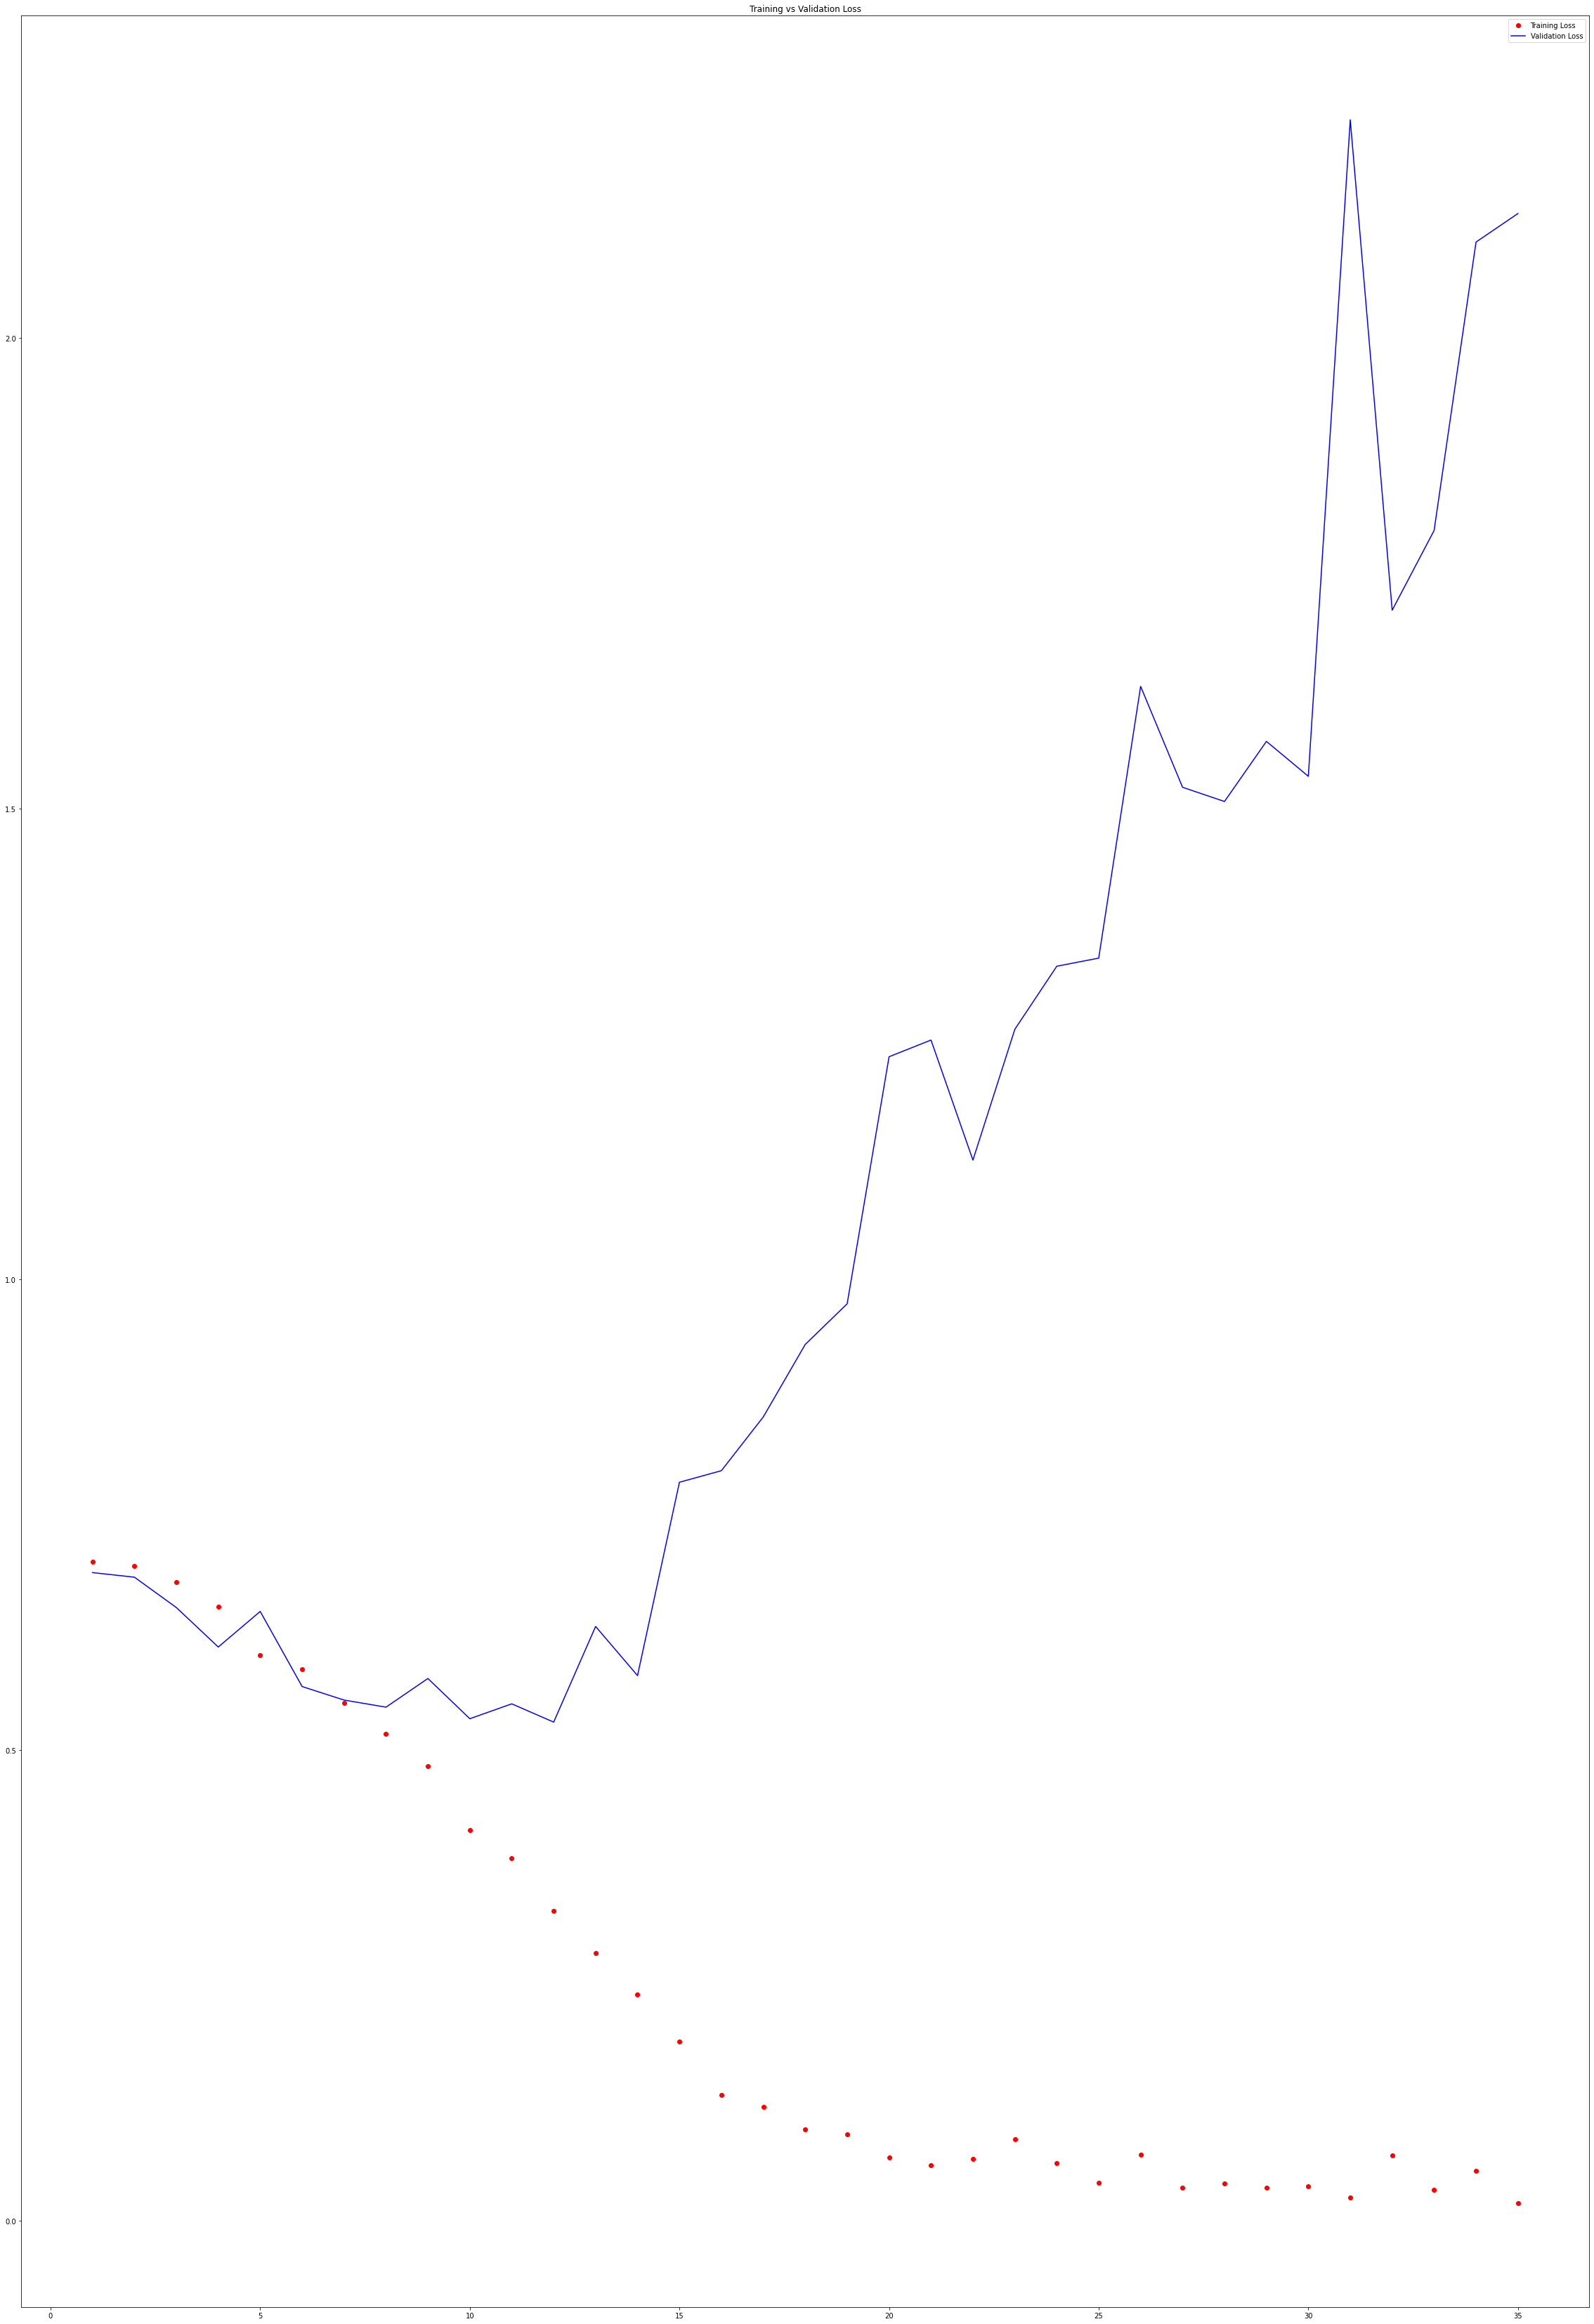

In [30]:
plot_training(history1)

## Our initial cats vs dogs model is 69% accurate... can we do better??

In [31]:
dogs_vs_cats_test = import_img_dir(
    new_dir /'test',
    image_size=(180,180),
    batch_size =32
)

test_loss, test_acc, test_FP = dog_cat_cnn.evaluate(dogs_vs_cats_test)

print(f"Model Testing Accuracy = {test_acc:.3f}, with {test_FP:.0f} false positives")

Found 2000 files belonging to 2 classes.
63/63 [==============================] - 2s 33ms/step - loss: 0.5544 - accuracy: 0.7300 - false_positives: 169.0000
Model Testing Accuracy = 0.730, with 169 false positives


# Model 3: Dogs vs Cats CNN with Data Augmentation

Data Augmentation performs random transformations on existing training data to produce new (slightly different) training images. So we can increase the number of training samples, but each training image will still be unique, meaning the model won't see the **EXACT** same image twice.

Should reduce overfitting!!

In [48]:
##define some random layers of augementation

data_augmentation = keras.Sequential(
    [
        layers.RandomFlip('horizontal'),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),  
        layers.RandomBrightness(0.1),
    ]
)

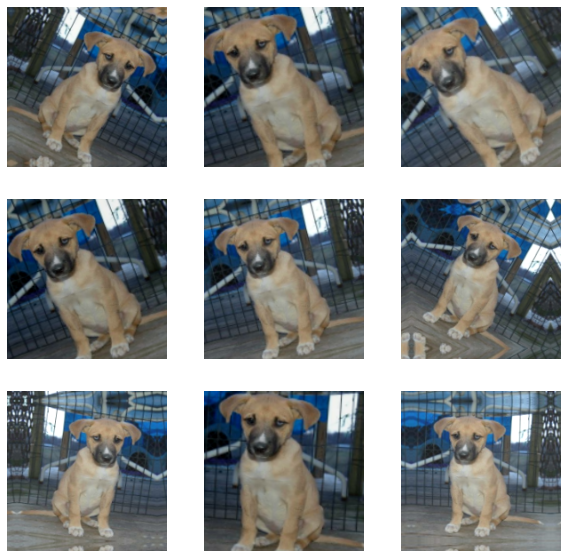

In [49]:
plt.figure(figsize=(10,10))
for img, _ in cats_v_dogs_train.take(1):
  for i in range(9):
    augmented_img = data_augmentation(img)
    ax = plt.subplot(3,3,i+1)
    ax.axis("off")
    plt.imshow(augmented_img[0].numpy().astype("uint8"))
    

In [50]:
inputs = keras.Input(shape=(180,180,3)) ##180*180 RGB images
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)##rescale to 0-1
x = layers.Conv2D(filters=32,kernel_size=3,activation ='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64,kernel_size=3,activation ='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128,kernel_size=3,activation ='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256,kernel_size=3,activation ='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256,kernel_size=3,activation ='relu')(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation = 'sigmoid')(x)
dog_cat_cnn2 = keras.Model(inputs=inputs, outputs=outputs)

dog_cat_cnn2.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 sequential_3 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_18 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 89, 89, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 87, 87, 64)        18496     
                                                           

In [51]:
##compile the model 
dog_cat_cnn2.compile(
    loss = 'binary_crossentropy', ##2 outcomes - cat or dog
    optimizer='rmsprop',
    metrics = ['accuracy']
)

In [ ]:
early_stop2 = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=1e-5, ## ignore any improvement under 0.02
    patience=38, ##keep training for 15 epochs
    restore_best_weights=True,
    verbose =1
)


history2 = dog_cat_cnn2.fit(
    cats_v_dogs_train,
    epochs= 250, 
    validation_data = cats_v_dogs_val,
    callbacks = [early_stop2]

)

Epoch 1/250
63/63 [==============================] - 23s 277ms/step - loss: 0.6965 - accuracy: 0.5135 - val_loss: 0.6927 - val_accuracy: 0.5000
Epoch 2/250
63/63 [==============================] - 16s 252ms/step - loss: 0.6945 - accuracy: 0.5135 - val_loss: 0.6918 - val_accuracy: 0.5000
Epoch 3/250
63/63 [==============================] - 16s 256ms/step - loss: 0.6895 - accuracy: 0.5560 - val_loss: 0.6885 - val_accuracy: 0.5150
Epoch 4/250
63/63 [==============================] - 17s 259ms/step - loss: 0.6719 - accuracy: 0.6040 - val_loss: 0.6891 - val_accuracy: 0.5600
Epoch 5/250
63/63 [==============================] - 16s 254ms/step - loss: 0.6558 - accuracy: 0.6285 - val_loss: 0.6580 - val_accuracy: 0.5740
Epoch 6/250
63/63 [==============================] - 18s 275ms/step - loss: 0.6453 - accuracy: 0.6455 - val_loss: 0.7184 - val_accuracy: 0.6030
Epoch 7/250
63/63 [==============================] - 16s 258ms/step - loss: 0.6221 - accuracy: 0.6470 - val_loss: 0.6128 - val_accuracy:

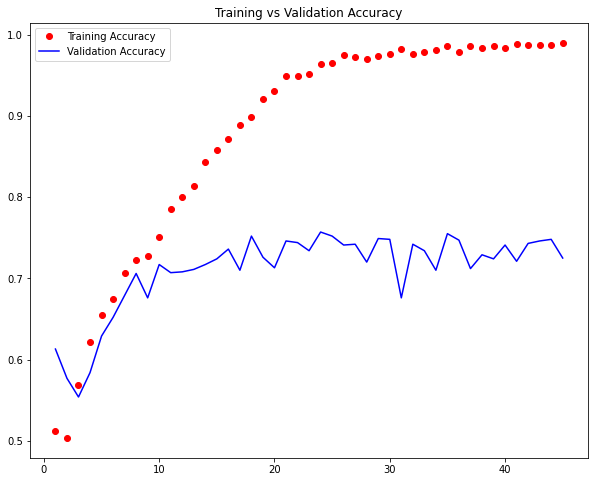

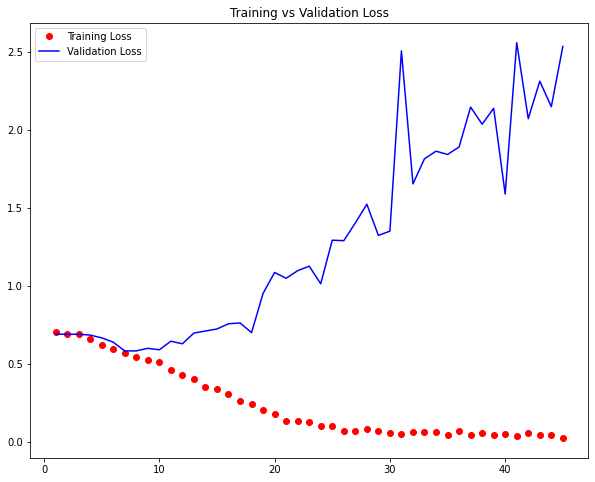

In [42]:
plt.rcParams['figure.figsize'] = [10, 8]
plot_training(history2)


